In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

In [2]:
df=pd.read_excel("diabetesUC.xlsx")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df['Pregnancies'].value_counts()

1      135
0      111
2      103
3       75
4       68
5       57
6       50
7       45
8       38
9       28
Ten     24
11      11
13      10
12       9
14       2
17       1
15       1
Name: Pregnancies, dtype: int64

In [6]:
df.loc[df['Pregnancies'] == 'Ten'] = 10

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [8]:
df=df.astype({'Pregnancies':int})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 51.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,117.428385,67.223958,20.358073,79.024740,31.347526,0.770184,32.220052,0.648438
std,3.369578,37.019852,21.518055,15.753749,115.019768,8.636856,1.690389,12.196341,1.744830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,10.000000,0.000000
25%,1.000000,97.000000,62.000000,0.000000,0.000000,26.575000,0.247000,23.000000,0.000000
50%,3.000000,115.000000,70.000000,22.000000,18.000000,31.900000,0.390000,28.000000,0.000000
75%,6.000000,139.250000,80.000000,32.000000,126.000000,36.500000,0.658500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,10.000000,81.000000,10.000000


In [11]:
df['Outcome'].value_counts()

0     486
1     258
10     24
Name: Outcome, dtype: int64

In [12]:
df.loc[df['Outcome'] == 10] = 1

In [13]:
df['Outcome'].value_counts()

0    486
1    282
Name: Outcome, dtype: int64

# EDA

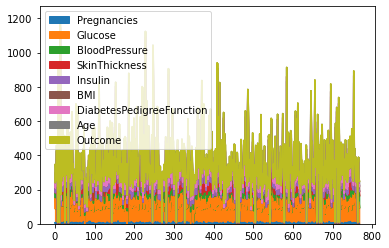

In [14]:
df.plot(kind='area')

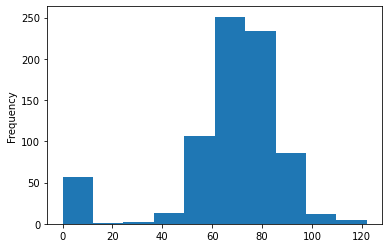

In [15]:
df['BloodPressure'].plot(kind='hist', bins=10)

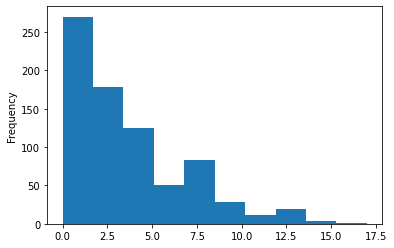

In [16]:
df['Pregnancies'].plot(kind='hist', bins=10)

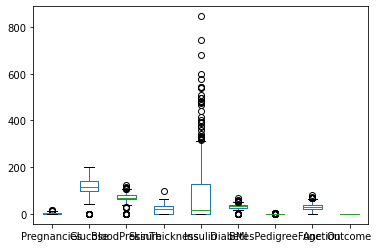

In [17]:
df.plot(kind='box')

# Splitting the data

In [18]:
X = df.drop(['Outcome'],axis=1,inplace=False)  
y = df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


# logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()   

In [24]:
clf.fit(X=X_train,y=y_train)

E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred = clf.predict(X_test)

In [26]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

# Evaluation

In [27]:
clf.score(X_train,y_train)

0.7101167315175098

In [28]:
clf.score(X_test,y_test)

0.7598425196850394

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree = DecisionTreeClassifier()

In [31]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
pred = tree.predict(X_test)

In [33]:
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [34]:
tree.score(X_train,y_train)

1.0

In [35]:
tree.score(X_test,y_test)

0.7007874015748031

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[120  44]
 [ 32  58]]


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest = RandomForestClassifier()

In [39]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
pred = forest.predict(X_test)

In [41]:
forest.score(X_train,y_train)

1.0

In [42]:
forest.score(X_test,y_test)

0.7755905511811023

# Ada Boost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada = AdaBoostClassifier()

In [45]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [46]:
ada.score(X_train,y_train)

0.8735408560311284

In [47]:
ada.score(X_test,y_test)

0.7440944881889764

# KNN neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier 

In [49]:
clf = KNeighborsClassifier(n_neighbors=1) 

In [50]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
pred = clf.predict(X_test)

In [52]:
clf.score(X_train,y_train)

1.0

In [53]:
clf.score(X_test,y_test)

0.7047244094488189

In [54]:
clf = KNeighborsClassifier(n_neighbors=10)

In [55]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
clf.score(X_train,y_train)

0.7957198443579766

In [57]:
clf.score(X_test,y_test)

0.7480314960629921

In [58]:
clf = KNeighborsClassifier(n_neighbors=50)

In [59]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=50)

In [60]:
clf.score(X_train,y_train)

0.7276264591439688

In [61]:
clf.score(X_test,y_test)

0.7244094488188977

In [62]:
clf = KNeighborsClassifier(n_neighbors=70)

In [63]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=70)

In [64]:
clf.score(X_train,y_train)

0.7101167315175098

In [65]:
clf.score(X_test,y_test)

0.7047244094488189

# SVC

In [66]:
from sklearn.svm import SVC

In [67]:
m=SVC()

In [68]:
m.fit(X=X_train,y=y_train)

SVC()

In [69]:
pred = m.predict(X_test)

In [70]:
m.score(X_train,y_train)

0.7801556420233463

In [71]:
m.score(X_test,y_test)

0.7480314960629921

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[146  18]
 [ 46  44]]


# Model Cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=1)
X = df.drop('Outcome',axis=1)
kmeans.fit(X)
KMeans(n_clusters=2, random_state=1)
kmeans.cluster_centers_
array([[  3.54710744, 110.54049587,  65.39173554,  17.13553719,
         31.45454545,  30.01123967,   0.45971405,  31.54049587],
       [  3.62576687, 141.66871166,  72.6993865 ,  30.99386503,
        254.26380368,  34.98220859,   0.5973865 ,  33.41717791]])
Evaluation
pred = kmeans.labels_
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Outcome']=enc.fit_transform(df['Outcome'])
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Outcome'],pred))
print(classification_report(df['Outcome'],pred))
[[408  78]
 [197  85]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       486
           1       0.52      0.30      0.38       282

    accuracy                           0.64       768
   macro avg       0.60      0.57      0.56       768
weighted avg       0.62      0.64      0.61       768



In [3]:
# Model Cluster